In [1]:
import pandas as pd 
import seaborn as sns
df=pd.read_csv('titanic_train (1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df=df.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


<AxesSubplot: xlabel='Sex', ylabel='count'>

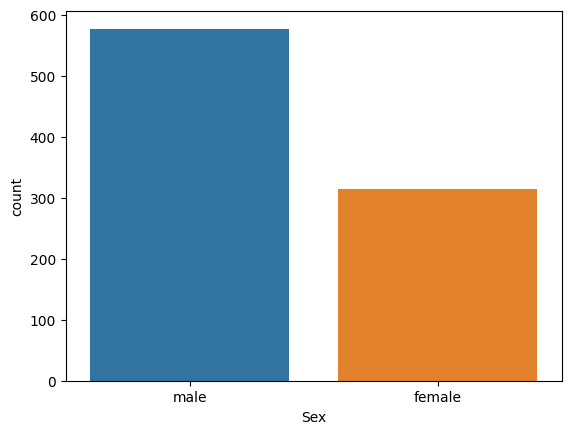

In [5]:
sns.countplot(data=df,x='Sex')

<AxesSubplot: xlabel='Sex', ylabel='count'>

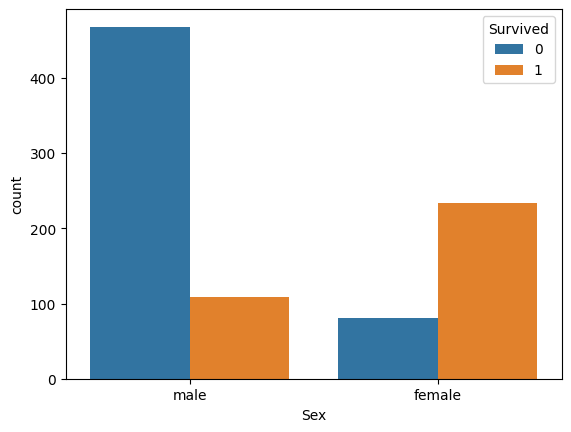

In [6]:
sns.countplot(data=df,x='Sex',hue='Survived')

<AxesSubplot: xlabel='Pclass', ylabel='count'>

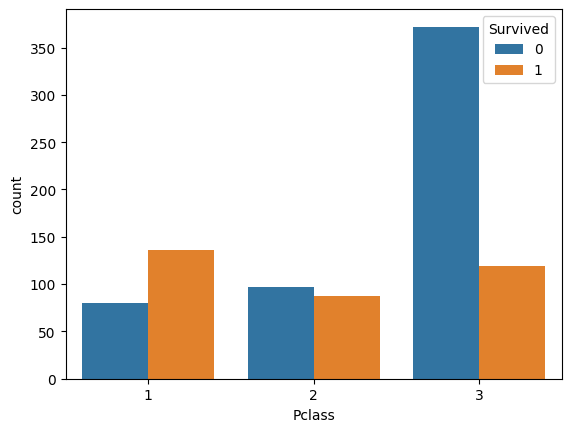

In [7]:
sns.countplot(data=df,x='Pclass',hue='Survived')

<AxesSubplot: xlabel='Parch', ylabel='count'>

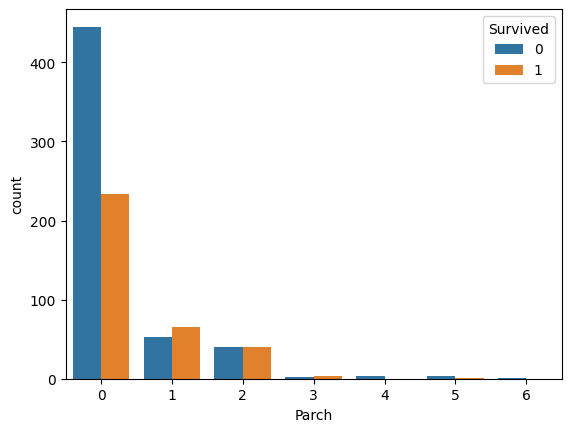

In [8]:
sns.countplot(data=df,x='Parch',hue='Survived')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


<AxesSubplot: xlabel='Age'>

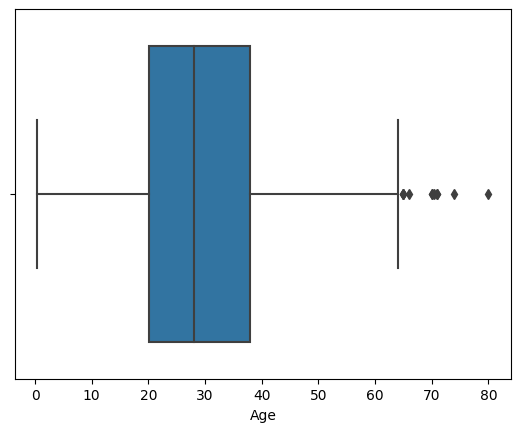

In [12]:
sns.boxplot(x='Age',data=df)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

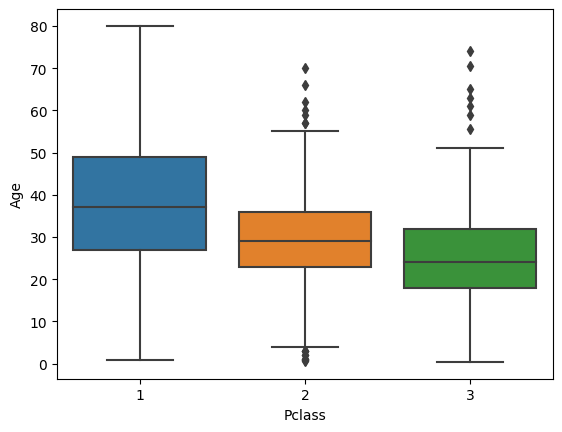

In [13]:
sns.boxplot(y='Age',data=df,x='Pclass')

In [14]:
d1=pd.get_dummies(df['Sex'],drop_first=True)

In [15]:
d1

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [16]:
d2=pd.get_dummies(df['Embarked'],drop_first=True)

In [17]:
d2

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [18]:
df=df.drop(['Sex','Embarked'],axis=1)

In [19]:
df.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [20]:
df1=pd.concat([df,d1,d2],axis=1)

In [21]:
df=df1

In [22]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [23]:
def convert(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [24]:
df['Age']=df[['Age','Pclass']].apply(convert,axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   male      891 non-null    uint8  
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 37.5 KB


In [26]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model_train=KNeighborsClassifier(11)
model_train.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [29]:
print(model_train.score(x_test,y_test))

0.7988826815642458
